In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(edgeitems=28)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, ..., 0, 9, 2, 4, 6, 7, 3, 1, 3, 6, 6, 2, 1, 2, 6,
       0, 7, 8, 9, 2, 9, 5, 1, 8, 3, 5, 6, 8], dtype=uint8)

In [ ]:
train_labels[0]

5

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_uniq_count = np.unique(train_labels, return_counts=True)
train_uniq_dict = dict(zip(*train_uniq_count))
train_uniq_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [ ]:
test_uniq_count = np.unique(test_labels, return_counts=True)
test_uniq_dict = dict(zip(*test_uniq_count))
test_uniq_dict

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

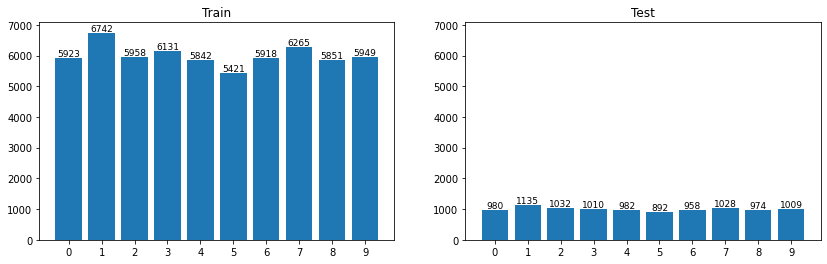

In [ ]:
def bars_annotation(ax, bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()+60, height, ha='center', fontsize=9)

_, ax = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

unique_train_labels, train_counts = np.unique(train_labels, return_counts=True)
train_bars = ax[0].bar(unique_train_labels, train_counts)
bars_annotation(ax[0], train_bars)
ax[0].set_xticks(unique_train_labels)
ax[0].set_title('Train')

unique_test_labels, test_counts = np.unique(test_labels, return_counts=True)
test_bars = ax[1].bar(unique_test_labels, test_counts)
bars_annotation(ax[1], test_bars)
ax[1].set_xticks(unique_test_labels)
ax[1].yaxis.set_tick_params(labelleft=True)
ax[1].set_title('Test')

plt.savefig('balanced.png', dpi=300, bbox_inches='tight')

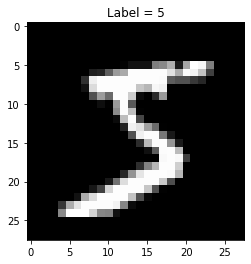

In [ ]:
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label = {train_labels[0]}')
plt.savefig('digits.png', dpi=300)

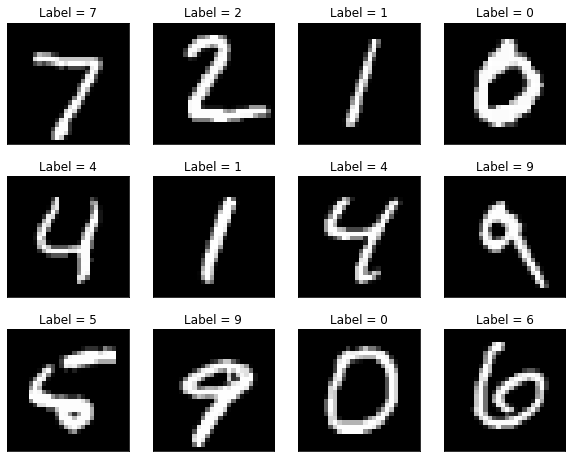

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(10,8))
for i, ax in enumerate(axes.ravel()):
  ax.imshow(test_images[i], cmap='gray')
  ax.tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)
  ax.set_title(f'Label = {test_labels[i]}')
plt.savefig('grid_digits.png', dpi=300)